In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\income.csv")
data

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


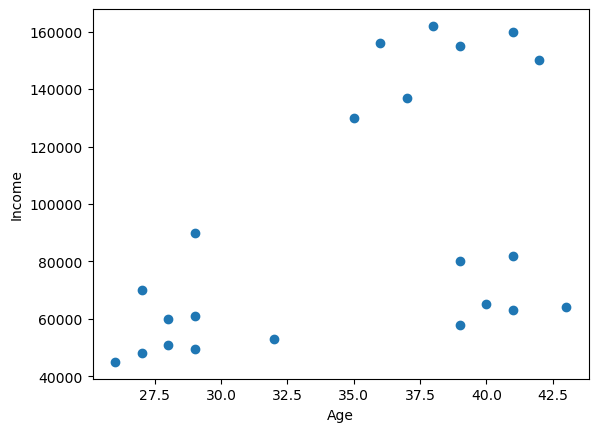

In [6]:
plt.scatter(data.Age, data['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [8]:
# apply KMeans Algorithm
km = KMeans(n_clusters=3)
predict_model = km.fit_predict(data[['Age', 'Income']])
predict_model

C:\ProgramData\anaconda39\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda39\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [9]:
data['cluster'] = predict_model
data.head()

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [10]:
# cluster's centroids
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [11]:
data1 = data[data.cluster == 0]
data2 = data[data.cluster == 1]
data3 = data[data.cluster == 2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


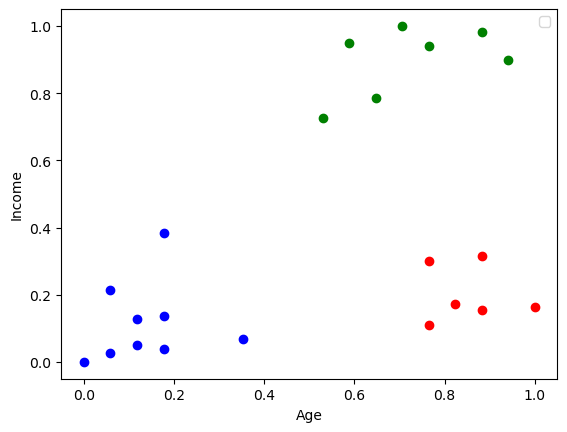

In [37]:
plt.scatter(data1.Age, data1['Income'], color='green')
plt.scatter(data2.Age, data2['Income'], color='blue')
plt.scatter(data3.Age, data3['Income'], color='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [20]:
scaler = MinMaxScaler() # mimmaxscaler ka use karke hm value ko 0-1 ke scale me lekr aate hai
scaler.fit(data[['Income']])
data['Income'] = scaler.transform(data[['Income']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

data.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [22]:
km = KMeans(n_clusters=3)
predictModel = km.fit_predict(data[['Age', 'Income']])
predictModel

C:\ProgramData\anaconda39\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda39\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [24]:
data['cluster'] = predictModel
data.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [26]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [27]:
data1 = data[data.cluster == 0]
data2 = data[data.cluster == 1]
data3 = data[data.cluster == 2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


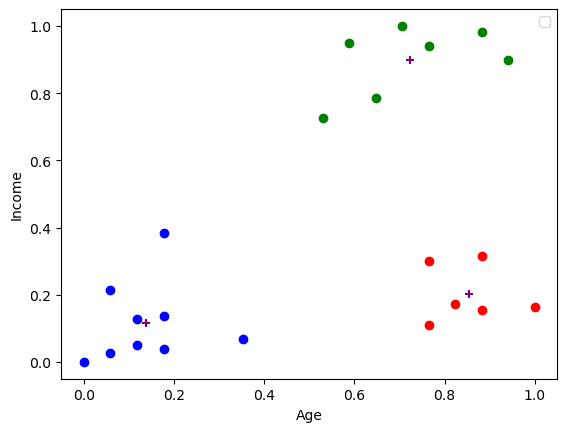

In [30]:
plt.scatter(data1.Age, data1['Income'], color='green')
plt.scatter(data2.Age, data2['Income'], color='blue')
plt.scatter(data3.Age, data3['Income'], color='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
# also plot centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='+', label='centroid')

In [34]:
# when we have lot of feature then we find the value of k using elbow method
# Elbow Method

# sum of square error
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age', 'Income']])
    sse.append(km.inertia_)

C:\ProgramData\anaconda39\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda39\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda39\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda39\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [35]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530933,
 0.3491047094419564,
 0.26640301246684145,
 0.2155256331475537,
 0.16858512236029757,
 0.1327661931978319,
 0.10907864282306068]

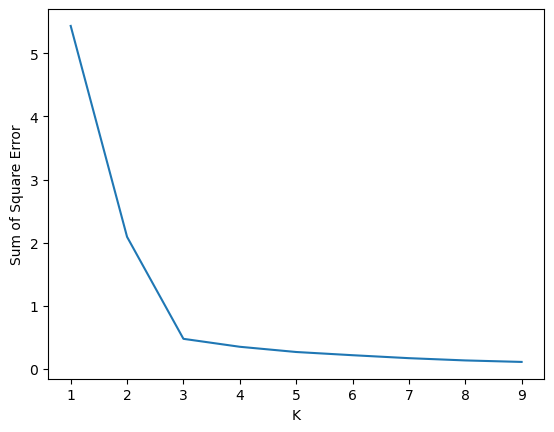

In [36]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.plot(k_rng,sse)

from above plot we can see the value of k=3 is our Elbow so K=3 is most appripriate value to start it.